In [17]:
!pip install shap

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.inspection import permutation_importance
import shap

sns.set(style="whitegrid", palette="muted")

In [19]:
clf_model = joblib.load("../models/classifier_new.pkl")
reg_model = joblib.load("../models/regressor.pkl")

In [20]:
df = pd.read_csv("../data/customers_50k.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

X = df.drop(columns=["Customer_ID", "Purchased", "Probability_Score"])
y_class = df["Purchased"]
y_reg = df["Probability_Score"]

numeric_features = ["Age", "Annual_Income", "Family_Size", "Credit_Score", 
                    "Travel_Frequency", "Web_Visits", "Email_Engagement"]

categorical_features = ["Gender", "Marital_Status", "Previous_Package"]

In [21]:
rf_clf = clf_model.named_steps['classifier']

In [22]:
# ✅ Get encoded feature names safely
ohe = clf_model.named_steps['preprocessor'].named_transformers_['cat']
onehot_features = list(ohe.get_feature_names_out())

# ✅ Combine numeric + one-hot features
all_features = numeric_features + onehot_features


In [23]:
# Get feature importances
clf_importances = rf_clf.feature_importances_

In [24]:
# Create DF for visualization
clf_feat_imp = pd.DataFrame({"Feature": all_features, "Importance": clf_importances})
clf_feat_imp = clf_feat_imp.sort_values("Importance", ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_1656\2574372459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=clf_feat_imp.head(15), palette="viridis")


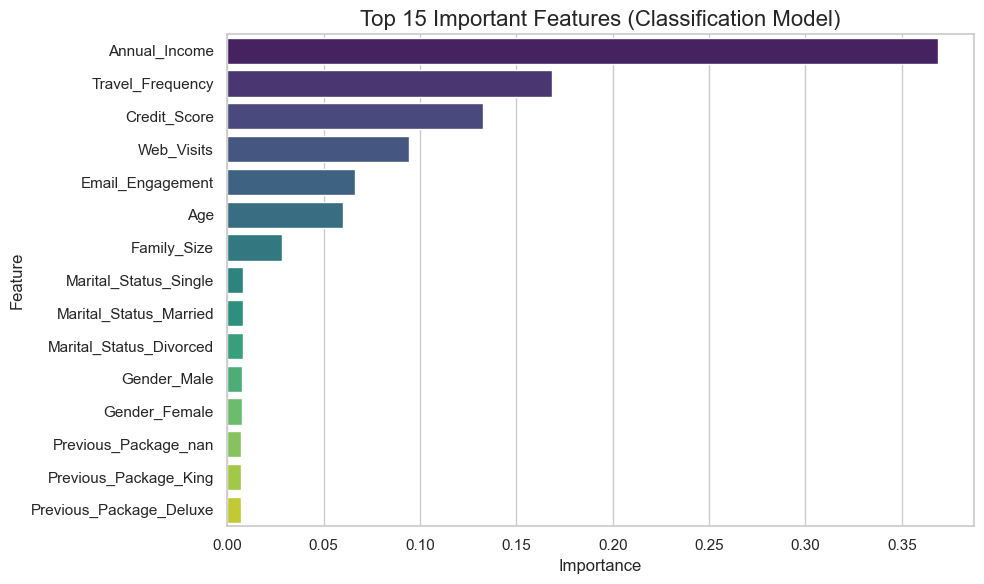

In [25]:

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=clf_feat_imp.head(15), palette="viridis")
plt.title("Top 15 Important Features (Classification Model)", fontsize=16)
plt.tight_layout()
plt.show()

In [26]:
rf_reg = reg_model.named_steps['regressor']

In [27]:
all_features = numeric_features + onehot_features

In [28]:

# Get feature importances for regression model
reg_importances = rf_reg.coef_

In [29]:
# Create DF for visualization
reg_feat_imp = pd.DataFrame({"Feature": all_features, "Importance": reg_importances})
reg_feat_imp = reg_feat_imp.sort_values("Importance", ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_1656\717862576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=reg_feat_imp.head(15), palette="magma")


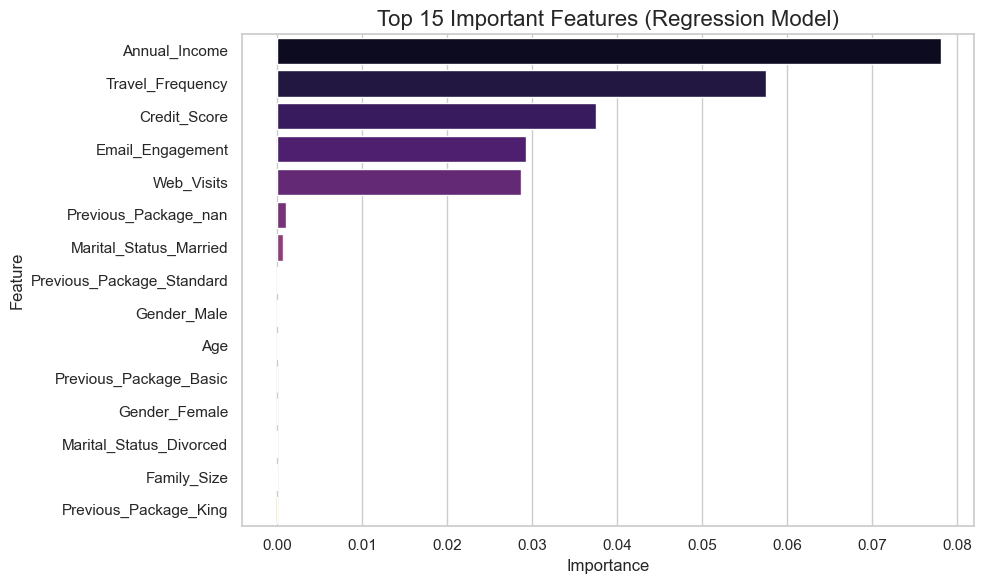

In [30]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=reg_feat_imp.head(15), palette="magma")
plt.title("Top 15 Important Features (Regression Model)", fontsize=16)
plt.tight_layout()
plt.show()

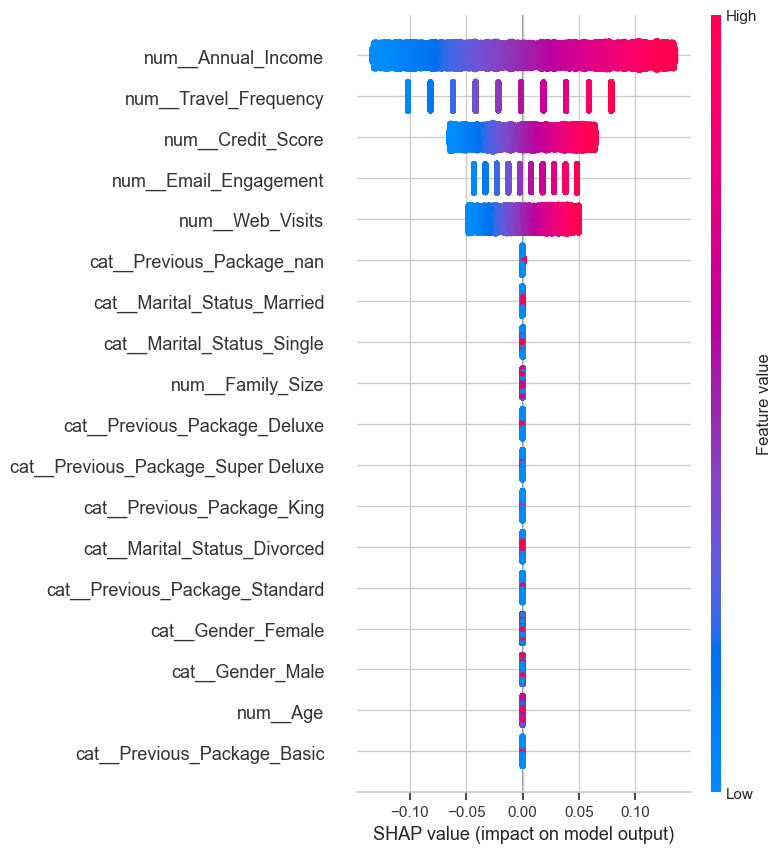

In [31]:
import shap

# Prepare the data (transformed features)
X_transformed = reg_model.named_steps['preprocessor'].transform(X)

# Get the actual regressor (LinearRegression)
linear_model = reg_model.named_steps['regressor']

# Use LinearExplainer for linear models
explainer = shap.LinearExplainer(linear_model, X_transformed)
shap_values = explainer.shap_values(X_transformed)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_transformed, feature_names=reg_model.named_steps['preprocessor'].get_feature_names_out())


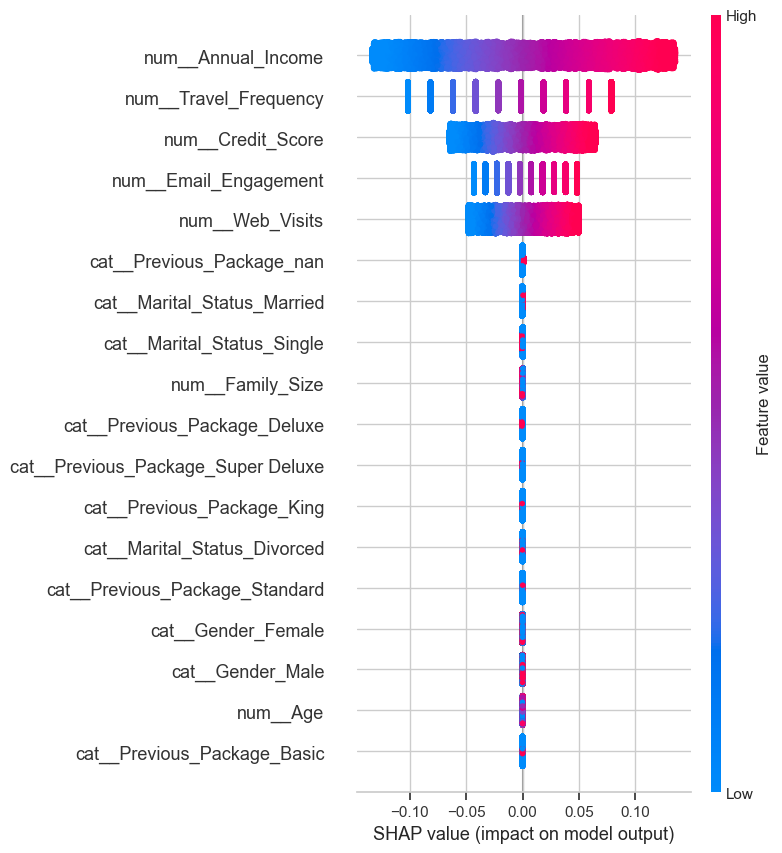

In [32]:
import shap

# Transform the data using the preprocessor from the pipeline
X_transformed = reg_model.named_steps['preprocessor'].transform(X)

# Extract the linear model
linear_model = reg_model.named_steps['regressor']

# Create the SHAP explainer
explainer = shap.LinearExplainer(linear_model, X_transformed)

# Calculate SHAP values
shap_values = explainer.shap_values(X_transformed)

# Remove bias column if present
if shap_values.shape[1] == X_transformed.shape[1] + 1:
    shap_values = shap_values[:, :-1]

# SHAP plot
shap.summary_plot(shap_values, X_transformed, feature_names=reg_model.named_steps['preprocessor'].get_feature_names_out())
